# Notebook for Jacobsville sandstone Pmag analyses

SC1: Snake Creek pmag site. Fine to medium sandstone. Coherent and strong material but have relatively low magnetization. Commonly have NRMs of E-5 emu. The high temperature (>660 degree C components are not very well resolved in demagnetization). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
Laurentia_outline = ShapelyFeature(Reader('../Data/Laurentia_shape/Laurentia.shp').geometries(),
                                ccrs.PlateCarree(), facecolor = 'none', edgecolor='black')

## Compile previous data from the Jacobsville Sandstone

### Dubois (1962) 

Du Bois, P. M. (1962). Palaeomagnetism and Correlation Fo Keweenawan Rocks. La Commission, Energie, mines et ressources Canada.

In [3]:
Dubois1962a_samples = pd.read_csv('../Data/Pmag_compiled/Dubois1962a_samples.txt', sep='\t', header = 1)
Dubois1962a_samples = ipmag.vgp_calc(Dubois1962a_samples,   tilt_correction='no',
    site_lon='lon',
    site_lat='lat',
    dec_is='dir_dec',
    inc_is='dir_inc',)
Dubois1962a_samples.head()

site            location  dir_dec  dir_inc  lat   lon  geologic_classes  \
0  CA1  Keweenaw Peninsula    260.5    -22.0   47 -88.5               NaN   
1   J1  Keweenaw Peninsula    219.5    -15.5   47 -88.5               NaN   
2   J4  Keweenaw Peninsula    239.5    -27.5   47 -88.5               NaN   
3   J5  Keweenaw Peninsula    219.5     43.0   47 -88.5               NaN   
4   J6  Keweenaw Peninsula    245.5    -32.0   47 -88.5               NaN   

   geologic_types  lithologies  method_codes  result_quality  result_type  \
0             NaN          NaN           NaN             NaN          NaN   
1             NaN          NaN           NaN             NaN          NaN   
2             NaN          NaN           NaN             NaN          NaN   
3             NaN          NaN           NaN             NaN          NaN   
4             NaN          NaN           NaN             NaN          NaN   

   dip_trend  dip  paleolatitude    vgp_lat     vgp_lon  vgp_lat_rev  \
0        NaN  NaN     -11.420796 -14.782534  180.508784    14.782534   
1        NaN  NaN      -7.894424 -38.441075  217.946992    38.441075   
2        NaN  NaN     -14.589431 -31.278642  194.168393    31.278642   
3        NaN  NaN      24.997641  -9.665423  235.711499     9.665423   
4        NaN  NaN     -17.350615 -29.212765  187.161425    29.212765   

   vgp_lon_rev  
0     0.508784  
1    37.946992  
2    14.168393  
3    55.711499  
4     7.161425

In [4]:
Dubois1962a_samples_kewee = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Keweenaw Peninsula']
Dubois1962a_samples_Marie = Dubois1962a_samples[Dubois1962a_samples['location'] == 'Sault Ste. Marie']

Dubois1962a_samples_kewee_mean = ipmag.fisher_mean(Dubois1962a_samples_kewee['dir_dec'].tolist(),
                                                   Dubois1962a_samples_kewee['dir_inc'].tolist())
Dubois1962a_samples_Marie_mean = ipmag.fisher_mean(Dubois1962a_samples_Marie['dir_dec'].tolist(),
                                                   Dubois1962a_samples_Marie['dir_inc'].tolist())

Dubois1962a_samples_kewee_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_kewee['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_kewee['vgp_lat'].tolist())
Dubois1962a_samples_Marie_mean_pole = ipmag.fisher_mean(Dubois1962a_samples_Marie['vgp_lon'].tolist(),
                                                        Dubois1962a_samples_Marie['vgp_lat'].tolist())

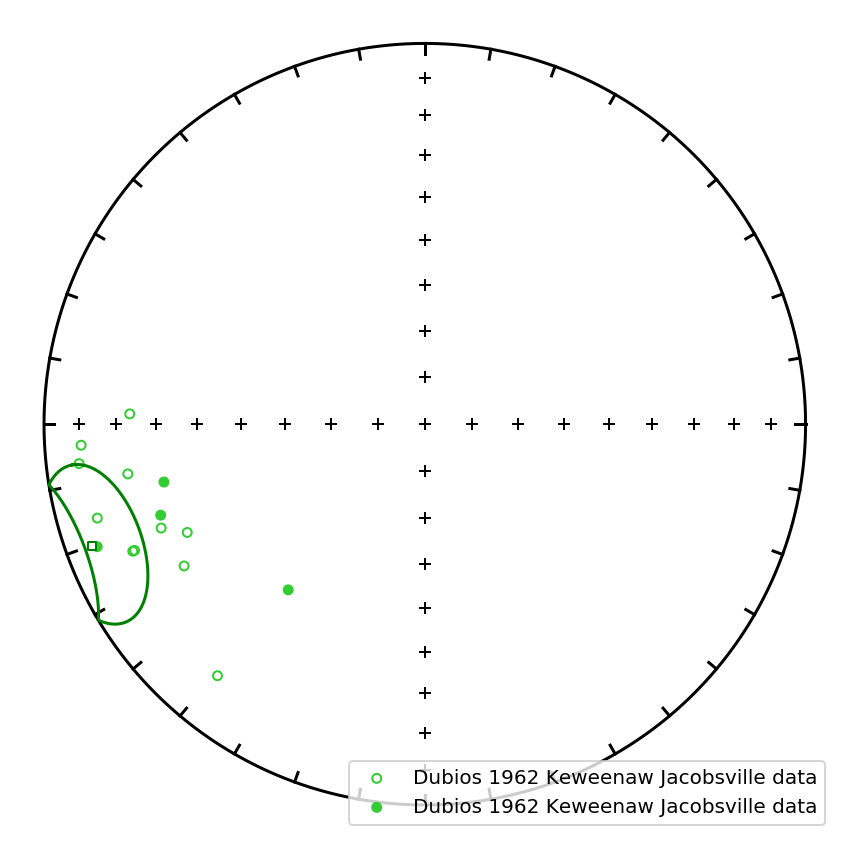

In [5]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_kewee['dir_dec'].tolist(),Dubois1962a_samples_kewee['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Keweenaw Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_kewee_mean['dec'],Dubois1962a_samples_kewee_mean['inc'],Dubois1962a_samples_kewee_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

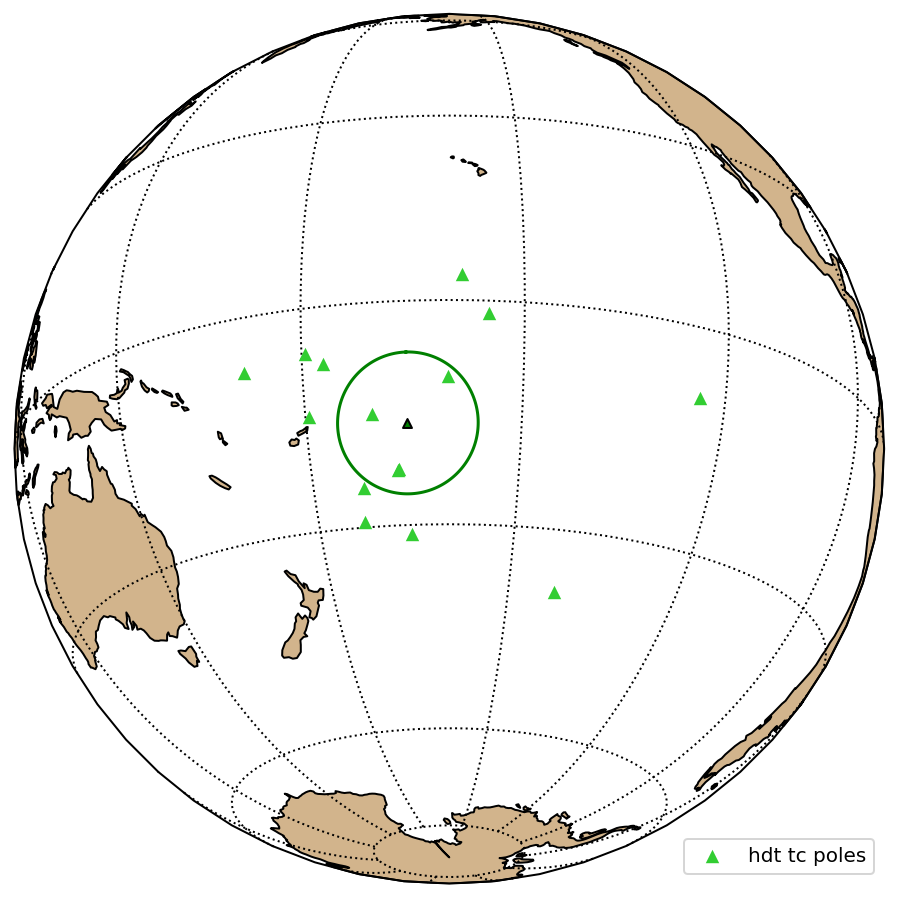

In [6]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_kewee['vgp_lon'].tolist(), 
               Dubois1962a_samples_kewee['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'hdt tc poles')

ipmag.plot_pole(map_axis, Dubois1962a_samples_kewee_mean_pole['dec'], 
                Dubois1962a_samples_kewee_mean_pole['inc'], 
                Dubois1962a_samples_kewee_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.show()

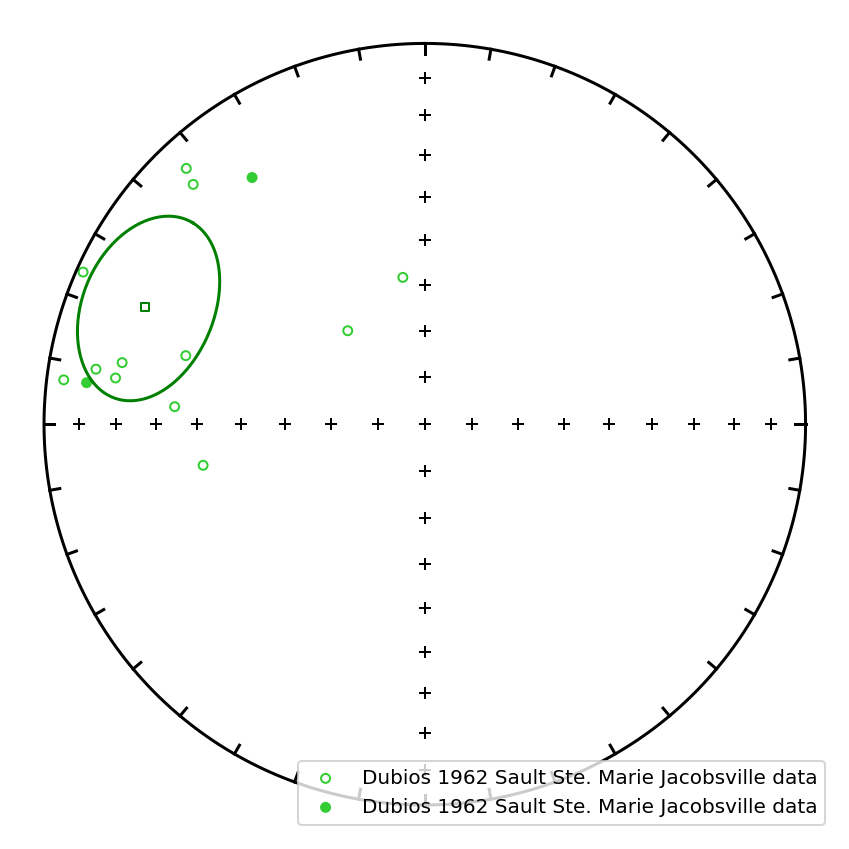

In [7]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Dubois1962a_samples_Marie['dir_dec'].tolist(),Dubois1962a_samples_Marie['dir_inc'].tolist(),
              color='limegreen',label='Dubios 1962 Sault Ste. Marie Jacobsville data')
ipmag.plot_di_mean(Dubois1962a_samples_Marie_mean['dec'],Dubois1962a_samples_Marie_mean['inc'],Dubois1962a_samples_Marie_mean['alpha95'],
                   color='green', marker = 's')
plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

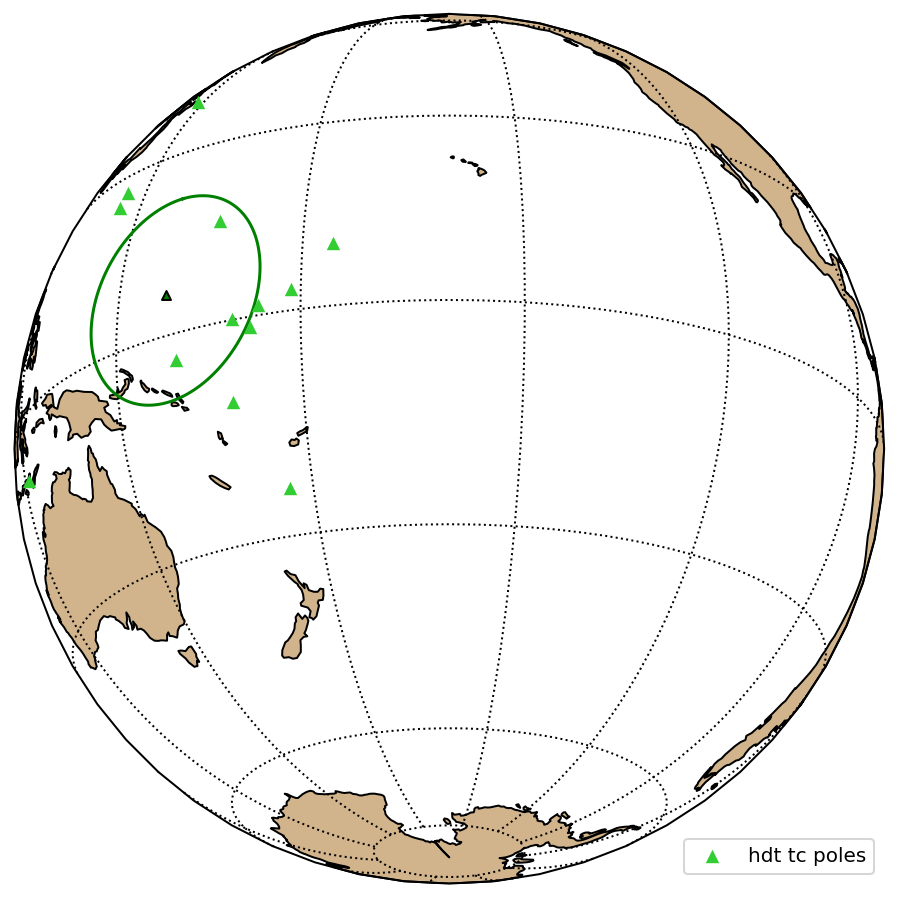

In [8]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Dubois1962a_samples_Marie['vgp_lon'].tolist(), 
               Dubois1962a_samples_Marie['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'limegreen', edge='none', label = 'hdt tc poles')

ipmag.plot_pole(map_axis, Dubois1962a_samples_Marie_mean_pole['dec'], 
                Dubois1962a_samples_Marie_mean_pole['inc'], 
                Dubois1962a_samples_Marie_mean_pole['alpha95'], 
                color = 'green', marker = '^')

plt.legend(loc=4)
plt.show()

### Roy (1978)

This study collected 257 specimens (37 sites - site here means one section) of the Jacobsville Sandstone from the Keweenaw Peninsula, Marquette area, and Sault ste. Marie area of Canada. Thermal demagnetization, AF, as well as chemical leaching methods were used to demagnetize the sandstone samples and it is interpreted that a total of three components exist in the sandstone. 

A 

It is found that the Jacobsville Sandstone from Sault Ste. Marie area have a pole position in the northern hemisphere whereas the sandstone in the Keweenaw Peninsula and marquette regions are of southern hemisphere, with the Keweenaw pole being more southerly than the Marquette pole. Similar results were found by Duboise (1962), data shown above.

The demagnetization protocol was cleaning. Chemical leaching is often 6700 hours, thermal demag is at 675 degree C, AF demag at 290 mT. 

**A major question: what is the definition of site for Roy (1978)? In Table 1 they listed the "site mean results" but also note the stratigraphic separation between different sites are often within 1 m. It seems that they are treating a stratigraphic horizon as one site and collect samples/specimens within one horizon and group them into an individual site. This is different from what we do - we collect samples across horizons and group all samples collected within one exposed Jacobsville strat section as one site. **

Their J2 remanence is very similar to our lt component - low temperature overprint of present day local field direction. It is still interesting, however, that some of the carrier of this component might have a coercivity of 200 mT - indicating that some of the pigmentary hematite wad contributing to the overprint. It is also interesting that their J2 direction mean is similar to our lt mean direction - a bit more easterly than expected!

Their J1 remanence is a shallow direction remanence consistent with our hdt component result. Their cut off between this J1 component and J2 component is set to be 100 hours, 600 degree C, or 200 mT treatment. 

- Roy, J. L., & Robertson, W. A. (1978). Paleomagnetism of the Jacobsville Formation and the apparent polar path for the interval− 1100 to− 670 my for North America. Journal of Geophysical Research: Solid Earth, 83(B3), 1289-1304.

Only J1 directions are compiled.

In [9]:
Roy1978a_sites = pd.read_csv('../Data/Pmag_compiled/Roy1978a_sites.txt', sep='\t', header=1)
Roy1978a_sites = Roy1978a_sites.dropna(axis=0)
Roy1978a_sites.head()

site           location Area  dir_dec  dir_inc  dir_k  dir_n_samples  \
0     1  Northern Michigan    A    249.0    -11.0   52.0              5   
1     2  Northern Michigan    A    238.0     -5.0   63.0              7   
2     3  Northern Michigan    A    244.0     -1.0   59.0              7   
3     4  Northern Michigan    A    252.0    -12.0  148.0              5   
4     5  Northern Michigan    A    269.0      3.0   15.0              6   

   dir_n_specimens  dir_n_total_specimens  dir_alpha95   lat   lon  vgp_lon  \
0                5                      5         11.0  47.3 -88.2    193.0   
1                7                      7          8.0  47.3 -87.2    204.0   
2                7                      7          8.0  47.3 -86.2    261.0   
3                5                      5          6.0  47.3 -85.2    191.0   
4                6                      6         21.0  47.3 -84.2    186.0   

   vgp_lat grain_size sample_color  
0     18.0    unknown      unknown  
1     23.0    unknown      unknown  
2     18.0    unknown      unknown  
3     17.0    unknown      unknown  
4      2.0    unknown      unknown

In [10]:
Roy1978a_sites_A = Roy1978a_sites[Roy1978a_sites['Area'] == 'A']
Roy1978a_sites_B = Roy1978a_sites[Roy1978a_sites['Area'] == 'B']
Roy1978a_sites_C = Roy1978a_sites[Roy1978a_sites['Area'] == 'C']

In [11]:
Roy1978a_sites_mean = ipmag.fisher_mean(Roy1978a_sites['dir_dec'].tolist(), Roy1978a_sites['dir_inc'].tolist())

Roy1978a_sites_mean_pole = ipmag.fisher_mean(Roy1978a_sites['vgp_lon'].tolist(),
                                                        Roy1978a_sites['vgp_lat'].tolist())

#### all J1 directions and poles

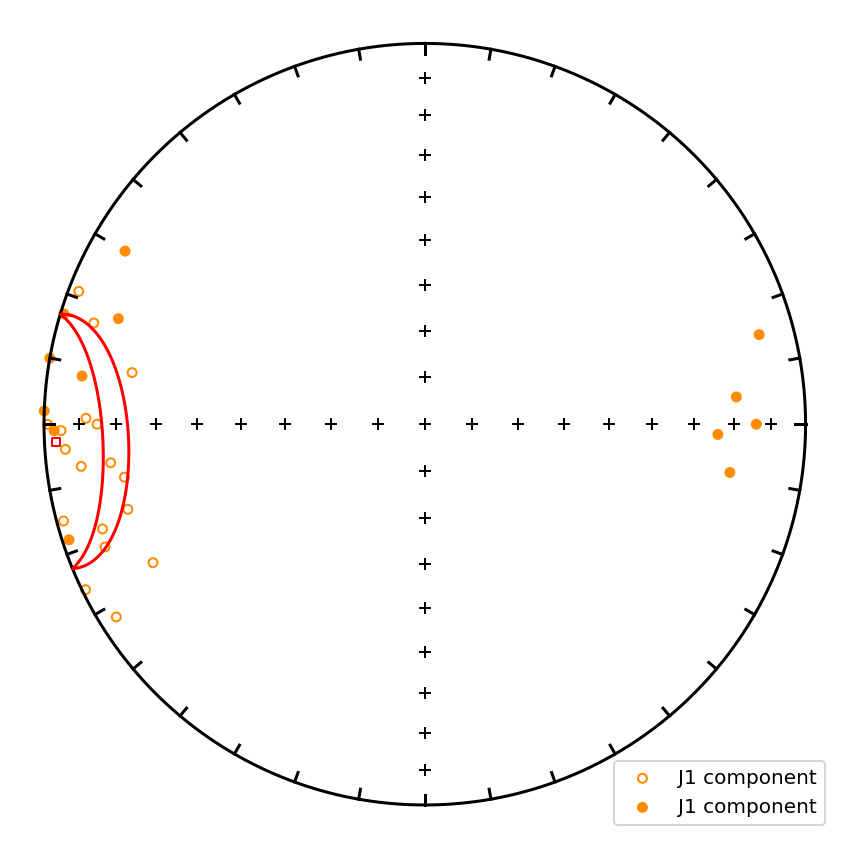

In [12]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites['dir_dec'].tolist(),Roy1978a_sites['dir_inc'].tolist(),color='darkorange',label='J1 component')

ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
                   color='red', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

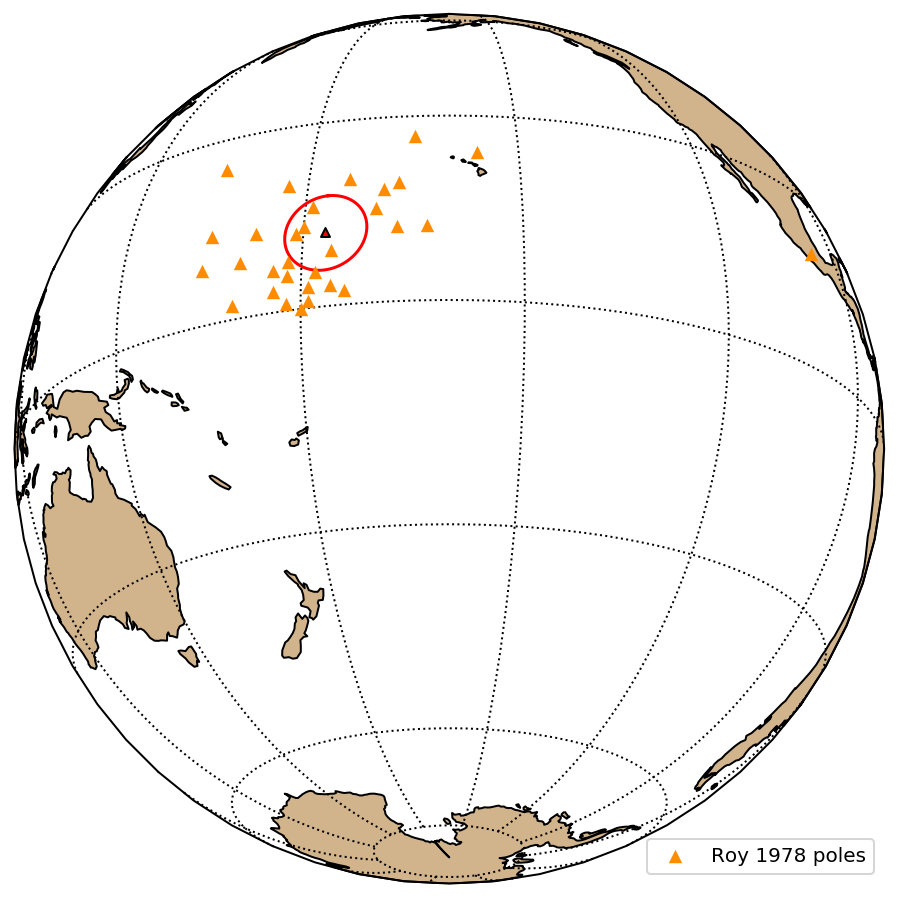

In [13]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Roy1978a_sites['vgp_lon'].tolist(), 
               Roy1978a_sites['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'darkorange', edge='none', label = 'Roy 1978 poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_mean_pole['dec'], 
                Roy1978a_sites_mean_pole['inc'], 
                Roy1978a_sites_mean_pole['alpha95'], 
                color = 'red', marker = '^')

plt.legend(loc=4)
plt.show()

#### J1 directions and poles by area

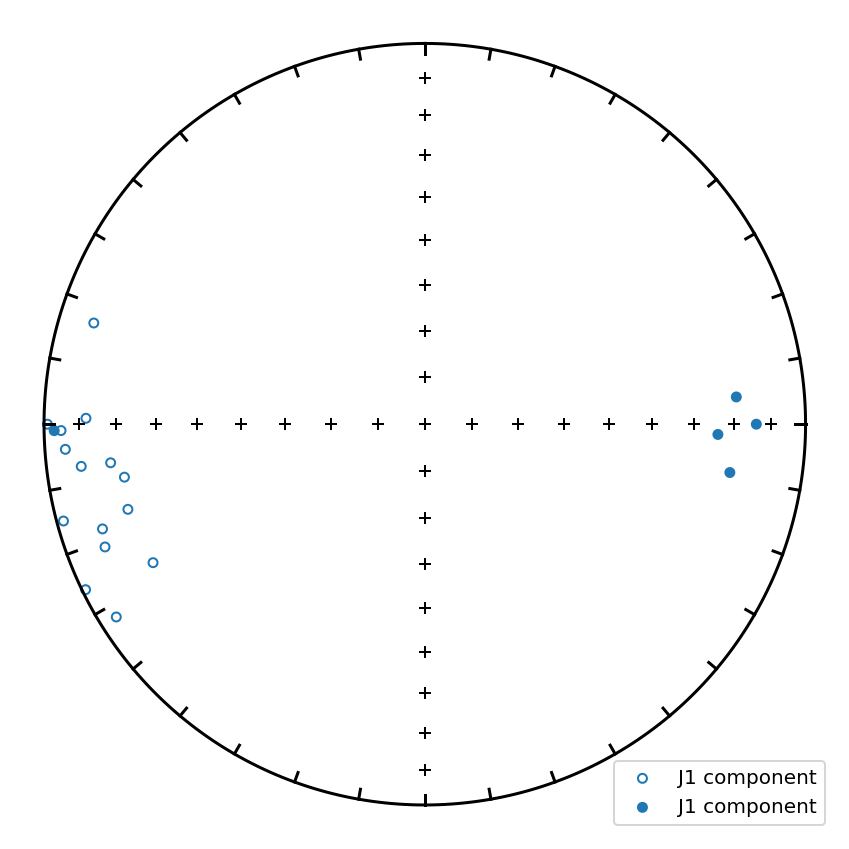

In [14]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_A['dir_dec'].tolist(),Roy1978a_sites_A['dir_inc'].tolist(),color='C0',label='J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

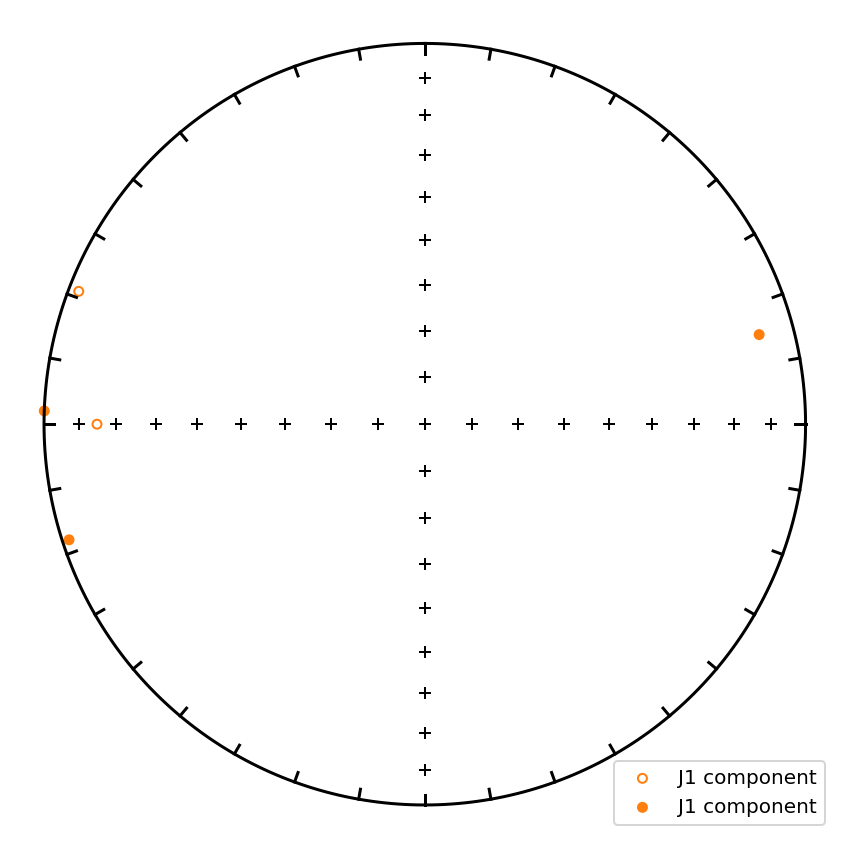

In [15]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_B['dir_dec'].tolist(),Roy1978a_sites_B['dir_inc'].tolist(),color='C1',label='J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

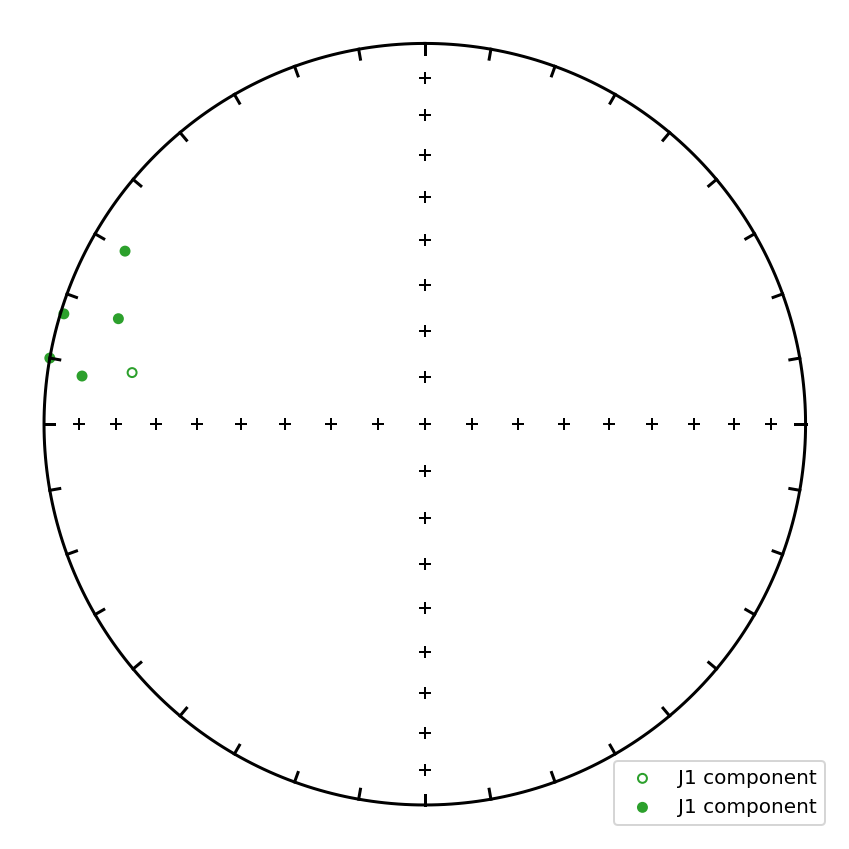

In [16]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(Roy1978a_sites_C['dir_dec'].tolist(),Roy1978a_sites_C['dir_inc'].tolist(),color='C2',label='J1 component')

# ipmag.plot_di_mean(Roy1978a_sites_mean['dec'],Roy1978a_sites_mean['inc'],Roy1978a_sites_mean['alpha95'],
#                    color='red', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

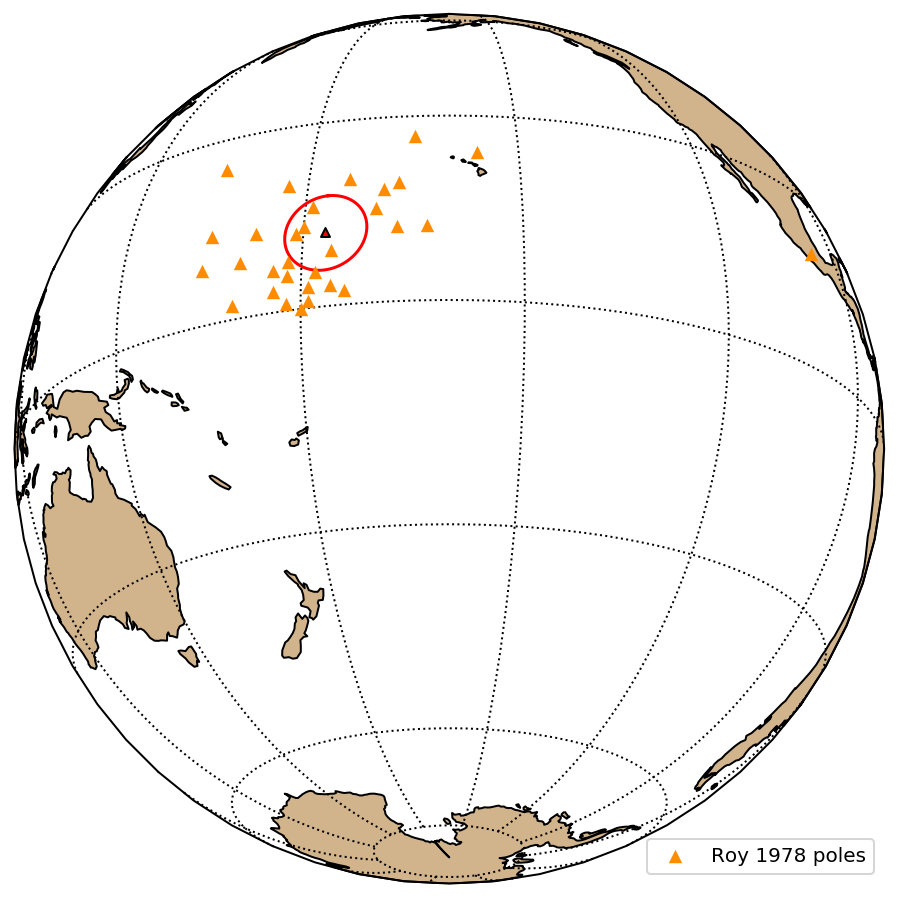

In [17]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, Roy1978a_sites['vgp_lon'].tolist(), 
               Roy1978a_sites['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'darkorange', edge='none', label = 'Roy 1978 poles')

ipmag.plot_pole(map_axis, Roy1978a_sites_mean_pole['dec'], 
                Roy1978a_sites_mean_pole['inc'], 
                Roy1978a_sites_mean_pole['alpha95'], 
                color = 'red', marker = '^')

plt.legend(loc=4)
plt.show()

**There are two possible explanations for the discrepancy between the J1 component directions in Keweenaw area and the Sault Ste. Marie area: (1) the directions reflect the poles recorded in the lower and the upper portion of the Jacobsville - with the Sault Ste. Marie Jacobsville being older (ca. 1050 Ma), closer to the Nonesuch-Freda pole position. This can be supported by the fact that the mean pole of all sites from Roy (1978) overlaps with the Nonesuch pole position. And this is consistent with that the Keweenaw Peninsulaa Jacobsville is younger (near the top, ca. 995 Ma) of the stratigraphic section of the whoe Jacobsville sedimentary package. (2) the directions are in fact inaccurate and insufficient to draw that conclusion. When we divide the data by area, we do not see many "site" level data for the different areas in Roy (1978) and that we do not see enough siltstone facies being used. According to the description from that study, a lot of the material are of coarse or very coarse lithology, and the color of the samples used vary from red to grey - indicating a great variety in hematite abundance. Such variable lithologies of the pmag samples pose complexities to the pmag data interpretation. In addition, Roy (1978) did not discuss inclination shallowing problem - although inclination shallowing may not be significant, it is necessary to investigate the issue with sedimentary paleomagnetic directions, especially when associated with red beds.**

## New pmag data from this study

In [18]:
Jacobsville_data = pd.read_csv('../Data/Pmag_new/specimens.txt', sep='\t', header=1)
Jacobsville_data['vgp_lon'] = pmag.dia_vgp(Jacobsville_data['dir_dec'], Jacobsville_data['dir_inc'], 0, 47.3, -88.2)[0]
Jacobsville_data['vgp_lat'] = pmag.dia_vgp(Jacobsville_data['dir_dec'], Jacobsville_data['dir_inc'], 0, 47.3, -88.2)[1]

SC1_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('SC')]
JK_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('JK')]
NW_spec_data = Jacobsville_data[Jacobsville_data['specimen'].str.contains('NW')]

- lt component: low temperature component of the fit, using geographic coordinates
- mt component: mid temperture component, compare geographic and tilt corrected coordinates
- hdt component: high temperature component, compare geographic and tilt corrected coordinates

In [19]:
SC1_spec_lt = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'lt') & (SC1_spec_data['dir_tilt_correction'] == 0)]
SC1_spec_hdt_gc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 0)]
SC1_spec_hdt_tc = SC1_spec_data[(SC1_spec_data['dir_comp'] == 'hdt') & (SC1_spec_data['dir_tilt_correction'] == 100)]

JK_spec_lt = JK_spec_data[(JK_spec_data['dir_comp'] == 'lt') & (JK_spec_data['dir_tilt_correction'] == 0)]
JK_spec_hdt_gc = JK_spec_data[(JK_spec_data['dir_comp'] == 'hdt') & (JK_spec_data['dir_tilt_correction'] == 0)]
JK_spec_hdt_tc = JK_spec_data[(JK_spec_data['dir_comp'] == 'hdt') & (JK_spec_data['dir_tilt_correction'] == 100)]

# NW_spec_lt = SC1_spec_data[(NW_spec_data['dir_comp'] == 'lt') & (NW_spec_data['dir_tilt_correction'] == 0)]
# NW_spec_hdt_gc = SC1_spec_data[(NW_spec_data['dir_comp'] == 'hdt') & (NW_spec_data['dir_tilt_correction'] == 0)]
# NW_spec_hdt_tc = SC1_spec_data[(NW_spec_data['dir_comp'] == 'hdt') & (NW_spec_data['dir_tilt_correction'] == 100)]

### section SC1 pmag components

In [20]:
SC1_spec_lt_mean = ipmag.fisher_mean(SC1_spec_lt['dir_dec'].tolist(), SC1_spec_lt['dir_inc'].tolist())
SC1_spec_hdt_gc_mean = ipmag.fisher_mean(SC1_spec_hdt_gc['dir_dec'].tolist(), SC1_spec_hdt_gc['dir_inc'].tolist())
SC1_spec_hdt_tc_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())

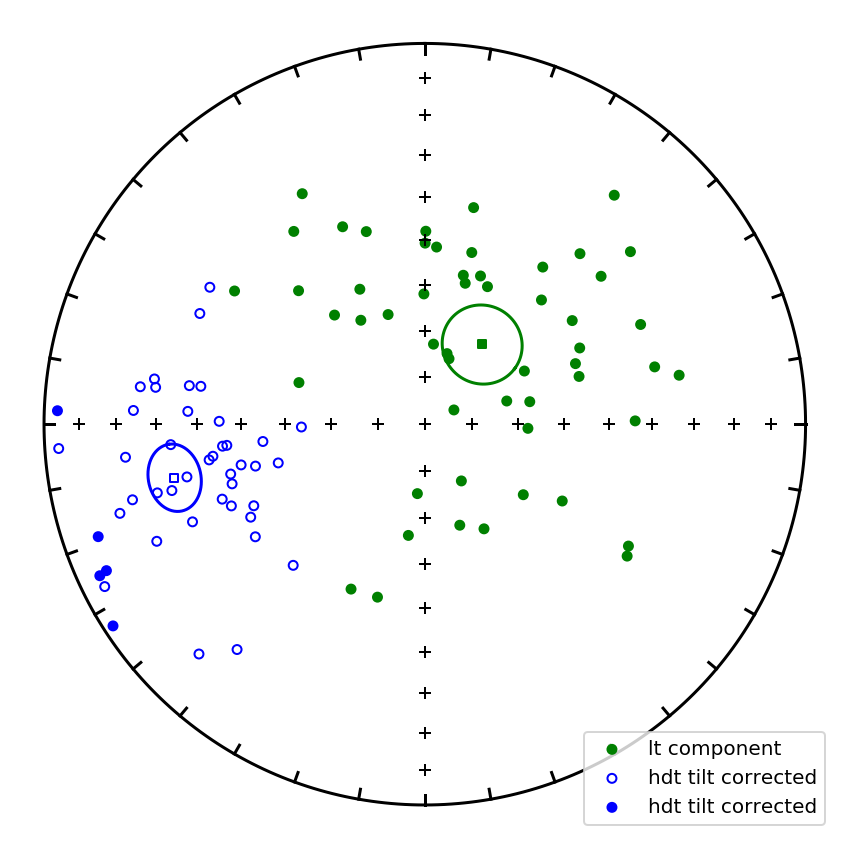

In [21]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_lt['dir_dec'].tolist(),SC1_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

# ipmag.plot_di(SC1_spec_hdt_gc['dir_dec'].tolist(),SC1_spec_hdt_gc['dir_inc'].tolist(),color='dodgerblue',label='hdt geographic')
ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')


ipmag.plot_di_mean(SC1_spec_lt_mean['dec'],SC1_spec_lt_mean['inc'],SC1_spec_lt_mean['alpha95'],
                   color='green', marker = 's')
# ipmag.plot_di_mean(SC1_spec_hdt_gc_mean['dec'],SC1_spec_hdt_gc_mean['inc'],SC1_spec_hdt_gc_mean['alpha95'],
#                    color='dodgerblue', marker = 's')
ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')


plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

In [22]:
SC1_spec_hdt_gc_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_gc['vgp_lon'].tolist(), SC1_spec_hdt_gc['vgp_lat'].tolist())
SC1_spec_hdt_tc_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist())

<Figure size 360x360 with 0 Axes>

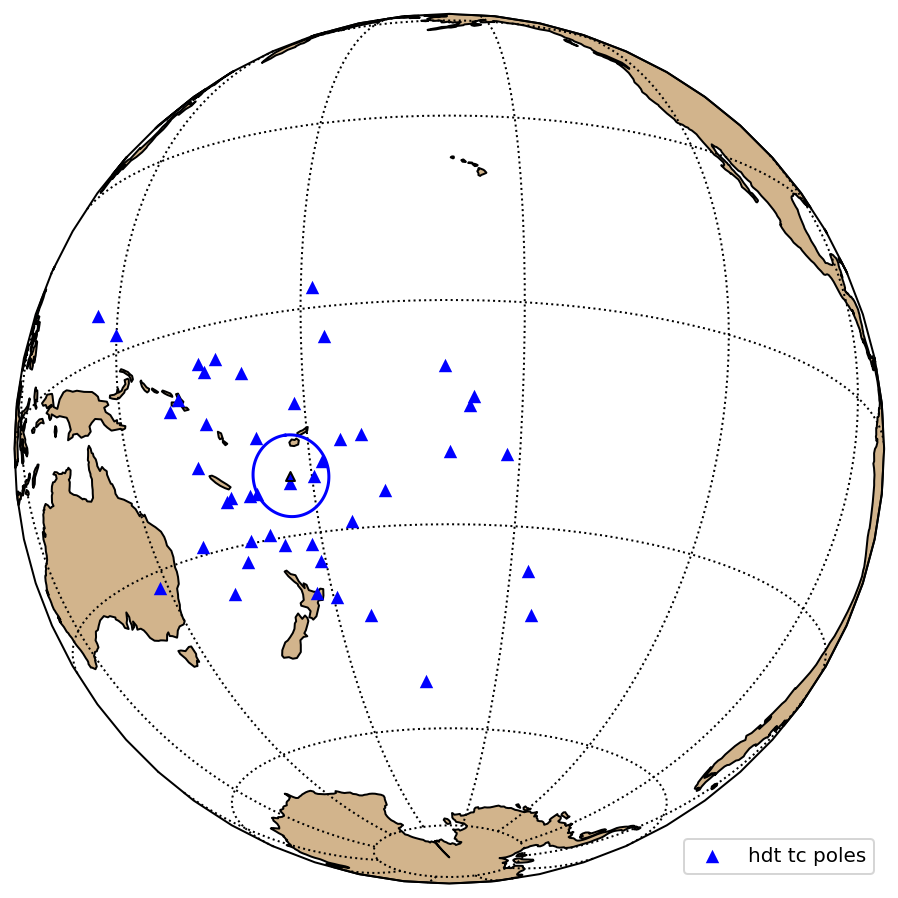

In [23]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

# ipmag.plot_vgp(map_axis, SC1_spec_hdt_gc['vgp_lon'].tolist(), 
#                SC1_spec_hdt_gc['vgp_lat'].tolist(), color = 'dodgerblue', label = 'hdt gc poles')
ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), 
               SC1_spec_hdt_tc['vgp_lat'].tolist(), markersize = 45, marker = '^', color = 'blue', edge='none', label = 'hdt tc poles')

# ipmag.plot_pole(map_axis, SC1_spec_hdt_gc_mean_pole['dec'], SC1_spec_hdt_gc_mean_pole['inc'], SC1_spec_hdt_gc_mean_pole['alpha95'], 
#                 color = 'dodgerblue', marker = 's')
ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = '^')

plt.legend(loc=4)
plt.show()

#### Unsquish SC1 ht component by 0.6

In [24]:
f = 0.6

SC1_spec_hdt_tc['dir_inc_unsquish'] = ipmag.unsquish(SC1_spec_hdt_tc['dir_inc'].tolist(), f)
SC1_spec_hdt_tc['vgp_lon_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[0]
SC1_spec_hdt_tc['vgp_lat_unsquish'] = pmag.dia_vgp(SC1_spec_hdt_tc['dir_dec'], SC1_spec_hdt_tc['dir_inc_unsquish'], 0, 47.3, -88.2)[1]

SC1_spec_hdt_tc_unsquish_mean = ipmag.fisher_mean(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc_unsquish'].tolist())
SC1_spec_hdt_tc_unsquish_mean_pole = ipmag.fisher_mean(SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist())

In [25]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_unsquish_mean)

Dec: 257.6  Inc: -44.8
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 7.2
Precision parameter (k) estimate: 9.7


In [26]:
ipmag.print_direction_mean(SC1_spec_hdt_tc_mean)

Dec: 257.9  Inc: -33.2
Number of directions in mean (n): 45
Angular radius of 95% confidence (a_95): 6.4
Precision parameter (k) estimate: 12.1


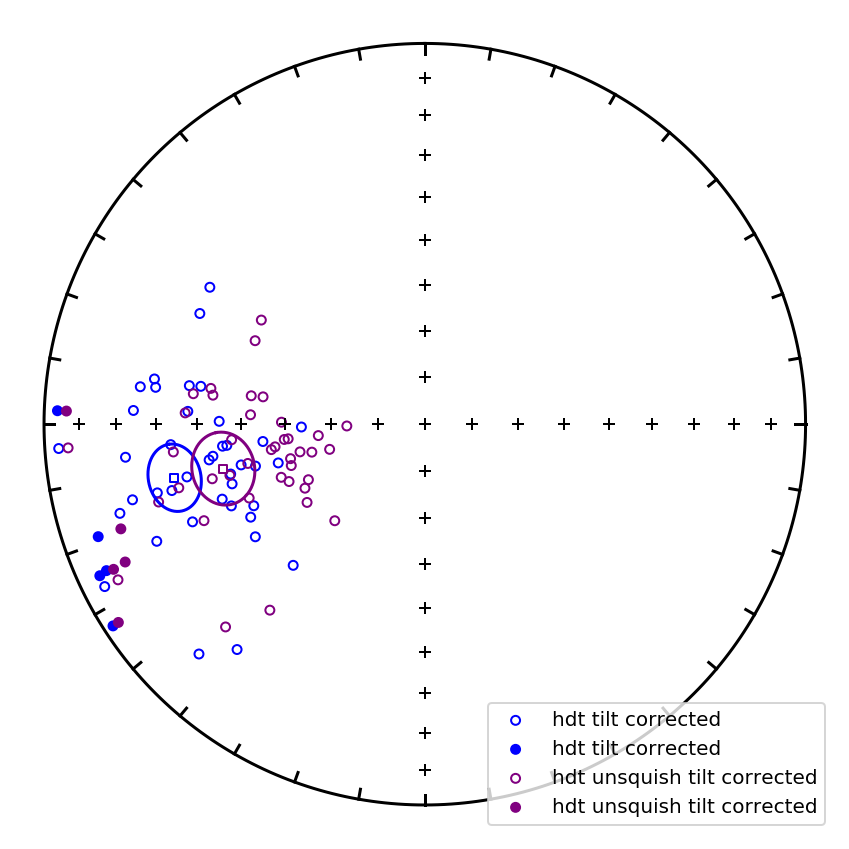

In [27]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')
ipmag.plot_di(SC1_spec_hdt_tc['dir_dec'].tolist(),SC1_spec_hdt_tc['dir_inc_unsquish'].tolist(),color='purple',label='hdt unsquish tilt corrected')

ipmag.plot_di_mean(SC1_spec_hdt_tc_mean['dec'],SC1_spec_hdt_tc_mean['inc'],SC1_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')
ipmag.plot_di_mean(SC1_spec_hdt_tc_unsquish_mean['dec'],SC1_spec_hdt_tc_unsquish_mean['inc'],SC1_spec_hdt_tc_unsquish_mean['alpha95'],
                   color='purple', marker = 's')

plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

<Figure size 360x360 with 0 Axes>

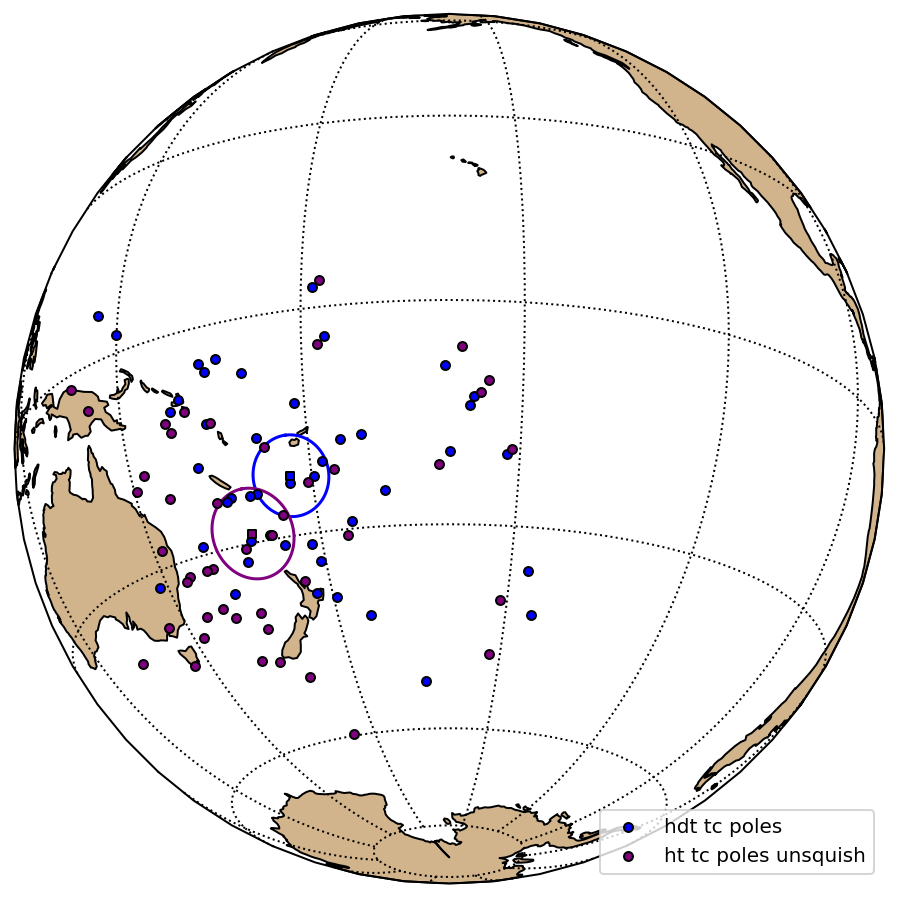

In [28]:
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=-20)

ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon'].tolist(), SC1_spec_hdt_tc['vgp_lat'].tolist(), color = 'blue', label = 'hdt tc poles')
ipmag.plot_vgp(map_axis, SC1_spec_hdt_tc['vgp_lon_unsquish'].tolist(), SC1_spec_hdt_tc['vgp_lat_unsquish'].tolist(), 
               color = 'purple', label = 'ht tc poles unsquish')

ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = 's')
ipmag.plot_pole(map_axis, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'purple', marker = 's')


plt.legend(loc=4)
plt.show()

#### fold test on Baby Snake Creek data

In [43]:
Jacobsville_sample_data = pd.read_csv('../Data/Pmag_new/Jacobsville_samples.txt', sep='\t', header = 1)
SC1_sample_bedding_data = Jacobsville_sample_data[Jacobsville_sample_data['site'] == 'SC1'][['sample', 'bed_dip', 'bed_dip_direction']]
SC1_sample_bedding_data.head()

sample  bed_dip  bed_dip_direction
0  SC1-1     95.0                160
1  SC1-2     95.0                160
2  SC1-3     95.0                160
3  SC1-4     95.0                160
4  SC1-5     95.0                160

In [48]:
SC1_spec_hdt_fold_test = pd.merge(SC1_spec_hdt_gc[['specimen', 'sample', 'dir_dec', 'dir_inc']], SC1_sample_bedding_data, left_on='sample', right_on='sample')
SC1_spec_hdt_fold_test.head()

specimen  sample  dir_dec  dir_inc  bed_dip  bed_dip_direction
0  SC1-10a  SC1-10    257.1    -18.2     93.0                164
1  SC1-12a  SC1-12    219.6    -53.7     81.0                157
2  SC1-14a  SC1-14    215.3    -43.7     81.0                157
3  SC1-15a  SC1-15    229.0    -21.9     81.0                157
4  SC1-16a  SC1-16    201.6    -16.7     81.0                157

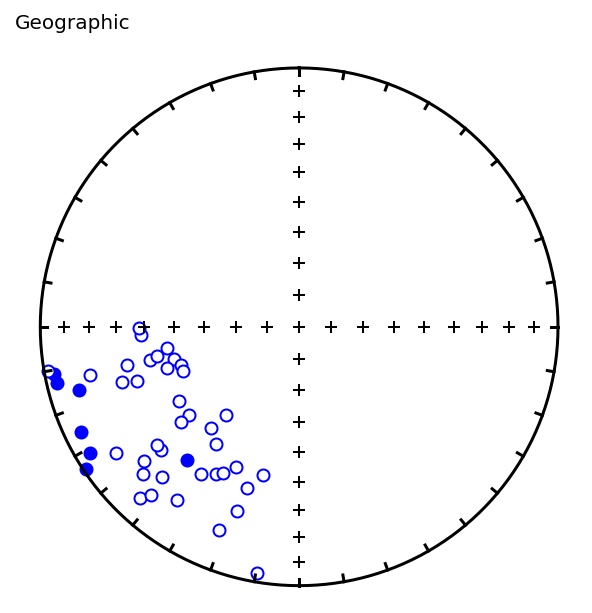

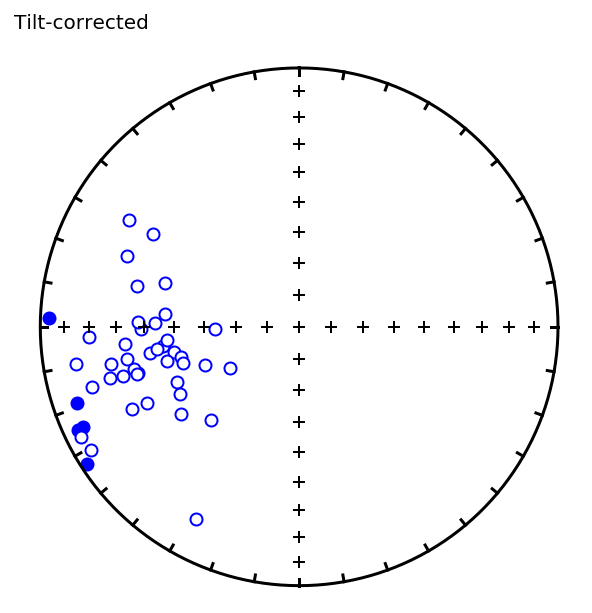

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
54 - 96 percent unfolding
range of all bootstrap samples: 
42  -  119 percent unfolding


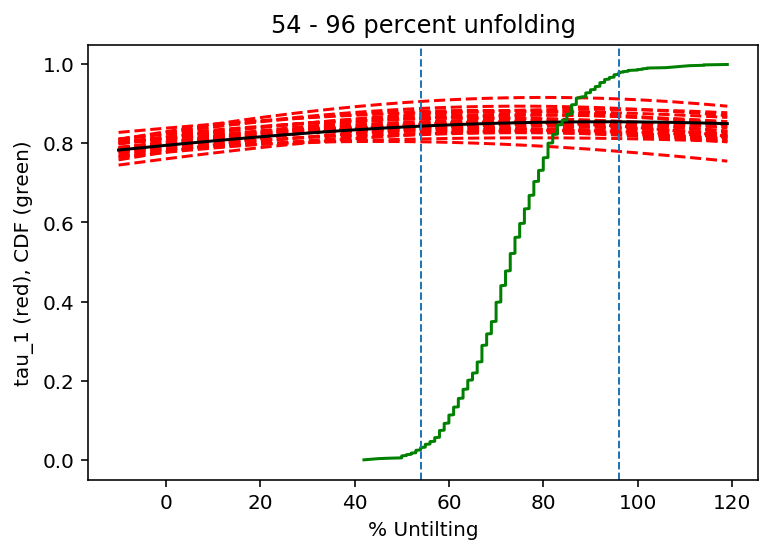

In [53]:
ipmag.bootstrap_fold_test(SC1_spec_hdt_fold_test[['dir_dec', 'dir_inc', 'bed_dip_direction', 'bed_dip']].to_numpy())


### section JK pmag component

In [29]:
JK_spec_lt_mean = ipmag.fisher_mean(JK_spec_lt['dir_dec'].tolist(), JK_spec_lt['dir_inc'].tolist())
JK_spec_hdt_gc_mean = ipmag.fisher_mean(JK_spec_hdt_gc['dir_dec'].tolist(), JK_spec_hdt_gc['dir_inc'].tolist())
JK_spec_hdt_tc_mean = ipmag.fisher_mean(JK_spec_hdt_tc['dir_dec'].tolist(), JK_spec_hdt_tc['dir_inc'].tolist())

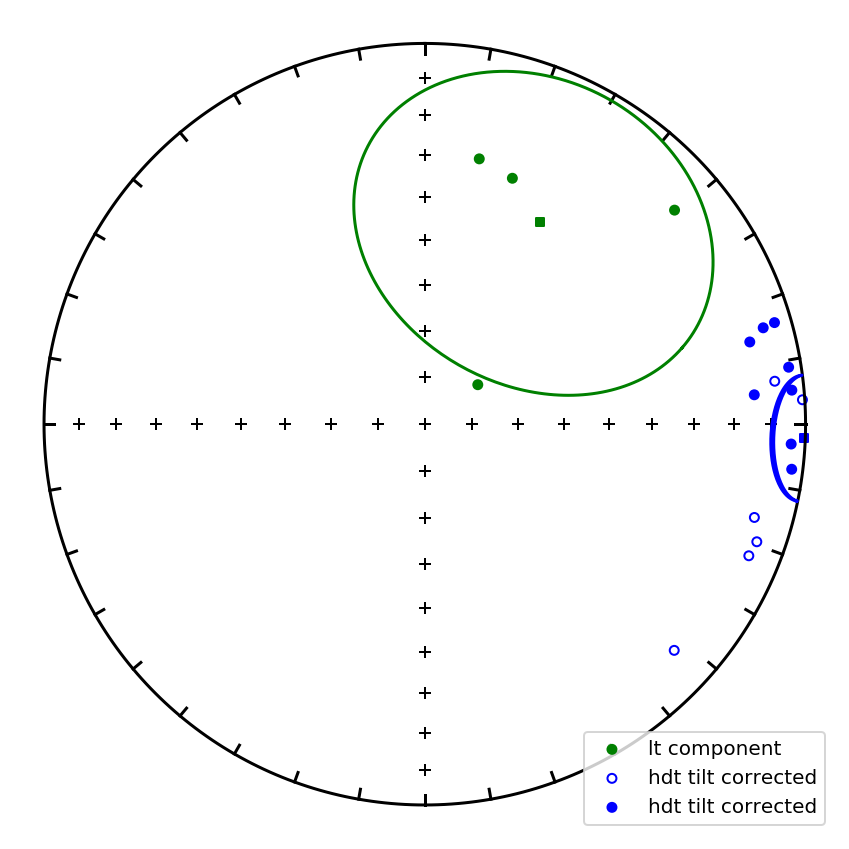

In [30]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(JK_spec_lt['dir_dec'].tolist(),JK_spec_lt['dir_inc'].tolist(),color='green',label='lt component')

# ipmag.plot_di(SC1_spec_hdt_gc['dir_dec'].tolist(),SC1_spec_hdt_gc['dir_inc'].tolist(),color='dodgerblue',label='hdt geographic')
ipmag.plot_di(JK_spec_hdt_tc['dir_dec'].tolist(),JK_spec_hdt_tc['dir_inc'].tolist(),color='blue',label='hdt tilt corrected')


ipmag.plot_di_mean(JK_spec_lt_mean['dec'],JK_spec_lt_mean['inc'],JK_spec_lt_mean['alpha95'],
                   color='green', marker = 's')
# ipmag.plot_di_mean(SC1_spec_hdt_gc_mean['dec'],SC1_spec_hdt_gc_mean['inc'],SC1_spec_hdt_gc_mean['alpha95'],
#                    color='dodgerblue', marker = 's')
ipmag.plot_di_mean(JK_spec_hdt_tc_mean['dec'],JK_spec_hdt_tc_mean['inc'],JK_spec_hdt_tc_mean['alpha95'],
                   color='blue', marker = 's')


plt.legend(loc=4)
# plt.savefig('../Figures/specimen_directions.pdf')
plt.show()

### Plot poles with Keweenawan track

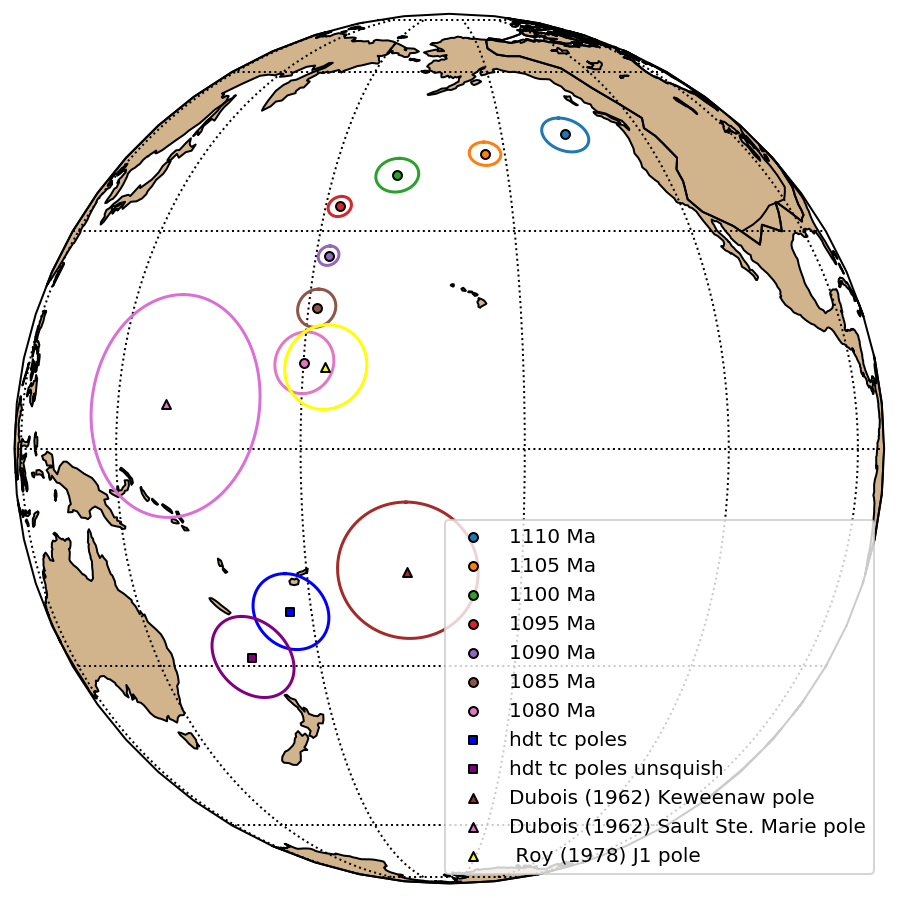

In [31]:
one_Euler_pole_lon = np.loadtxt('../Data/Keweenawan_track/pole_lon_positions_2_true.txt')
one_Euler_pole_lat = np.loadtxt('../Data/Keweenawan_track/pole_lat_positions_2_true.txt')

m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=200)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

fisher0 = ipmag.fisher_mean(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
theta0 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,0]+180,one_Euler_pole_lat[:,0])
fisher0['theta'] = theta0
ipmag.plot_pole(m,fisher0['dec'],fisher0['inc'],theta0,color='C0',label='1110 Ma')

fisher1 = ipmag.fisher_mean(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
theta1 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,1]+180,one_Euler_pole_lat[:,1])
fisher1['theta'] = theta1
ipmag.plot_pole(m,fisher1['dec'],fisher1['inc'],theta1,color='C1',label='1105 Ma')

fisher2 = ipmag.fisher_mean(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
theta2 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,2]+180,one_Euler_pole_lat[:,2])
fisher2['theta'] = theta2
ipmag.plot_pole(m,fisher2['dec'],fisher2['inc'],theta2,color='C2',label='1100 Ma')

fisher3 = ipmag.fisher_mean(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
theta3 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,3]+180,one_Euler_pole_lat[:,3])
fisher3['theta'] = theta3
ipmag.plot_pole(m,fisher3['dec'],fisher3['inc'],theta3,color='C3',label='1095 Ma')

fisher4 = ipmag.fisher_mean(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
theta4 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,4]+180,one_Euler_pole_lat[:,4])
fisher4['theta'] = theta4
ipmag.plot_pole(m,fisher4['dec'],fisher4['inc'],theta4,color='C4',label='1090 Ma')

fisher5 = ipmag.fisher_mean(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
theta5 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,5]+180,one_Euler_pole_lat[:,5])
fisher5['theta'] = theta5
ipmag.plot_pole(m,fisher5['dec'],fisher5['inc'],theta5,color='C5',label='1085 Ma')

fisher6 = ipmag.fisher_mean(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
theta6 = ipmag.fisher_angular_deviation(one_Euler_pole_lon[:,6]+180,one_Euler_pole_lat[:,6])
fisher6['theta'] = theta6
ipmag.plot_pole(m,fisher6['dec'],fisher6['inc'],theta6,color='C6',label='1080 Ma')

ipmag.plot_pole(m, SC1_spec_hdt_tc_mean_pole['dec'], SC1_spec_hdt_tc_mean_pole['inc'], SC1_spec_hdt_tc_mean_pole['alpha95'], 
                color = 'blue', marker = 's', label = 'hdt tc poles')
ipmag.plot_pole(m, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'purple', marker = 's', label = 'hdt tc poles unsquish')

ipmag.plot_pole(m, Dubois1962a_samples_kewee_mean_pole['dec'], 
                Dubois1962a_samples_kewee_mean_pole['inc'], 
                Dubois1962a_samples_kewee_mean_pole['alpha95'], 
                color = 'brown', marker = '^', label = 'Dubois (1962) Keweenaw pole')

ipmag.plot_pole(m, Dubois1962a_samples_Marie_mean_pole['dec'], 
                Dubois1962a_samples_Marie_mean_pole['inc'], 
                Dubois1962a_samples_Marie_mean_pole['alpha95'], 
                color = 'orchid', marker = '^', label = 'Dubois (1962) Sault Ste. Marie pole')

ipmag.plot_pole(m, Roy1978a_sites_mean_pole['dec'], 
                Roy1978a_sites_mean_pole['inc'], 
                Roy1978a_sites_mean_pole['alpha95'], 
                color = 'yellow', marker = '^', label = ' Roy (1978) J1 pole')

plt.legend(loc=4)
plt.show()

### Overview APWP

In [32]:
poles = pd.read_csv('../Data/Laurentia_poles/Laurentia_poles.csv')
poles = poles[8:]
poles.head()

Unnamed: 0                    PoleName  SLat    SLon  PLat   PLon  \
8       Mackenzie  Mackenzie dykes grand mean  65.0  250.00   4.0  190.0   
9         Sudbury      Sudbury Dykes Combined  46.3  278.60  -2.5  192.8   
10     Lamp_dikes           Lamprophyre dikes  48.8  273.30  58.0  223.3   
11  Abitibi_dikes               Abitibi dykes  48.0  279.00  44.4  211.4   
12       Osler_R1       Osler reverse (lower)  48.8  272.34  40.9  218.6   

     A95     K     N                      PolarityZone  \
8    5.0   NaN   5.0                               NaN   
9    2.5   NaN  52.0                               NaN   
10   9.2  37.8  19.0                 multiple polarity   
11  13.5   NaN   8.0                 multiple polarity   
12   4.8  31.5  30.0  Alona Bay reversed-polarity zone   

                                              PmagRef  AgeNominal  AgeLower  \
8                                 Buchan et al., 2000      1267.0   1265.00   
9            Palmer,H.C., Merz,B.A., Hayatsu,A., 1977      1237.0   1232.00   
10                                Piispa et al., 2018      1144.0   1130.00   
11  Ernst and Buchan (1993) and Halls et al. (2005...      1141.0   1139.00   
12                       Swanson-Hysell et al., 2014b      1108.0   1105.15   

    AgeUpper                                            AgeInfo  \
8     1269.0                                                NaN   
9     1242.0                                                NaN   
10    1155.0         U-Pb perovskite and Ar-Ar phlogopite dates   
11    1143.0                           U-Pb date on baddeleyite   
12    1110.0  Older than 1105.15 $\pm$ 0.33 Ma Osler reverse...   

                                   AgeRef  Gaussian_2sigma GaussianOrUniform  \
8                                     NaN              NaN               NaN   
9                                     NaN              NaN               NaN   
10                    Queen et al. (1996)              NaN               NaN   
11                      Krogh et al. 1987              NaN               NaN   
12  Davis and Sutcliffe, 1985; this study              NaN           uniform   

      Q    color  
8   NaN      NaN  
9   NaN      NaN  
10  NaN      NaN  
11  NaN      NaN  
12  7.0  #B82431

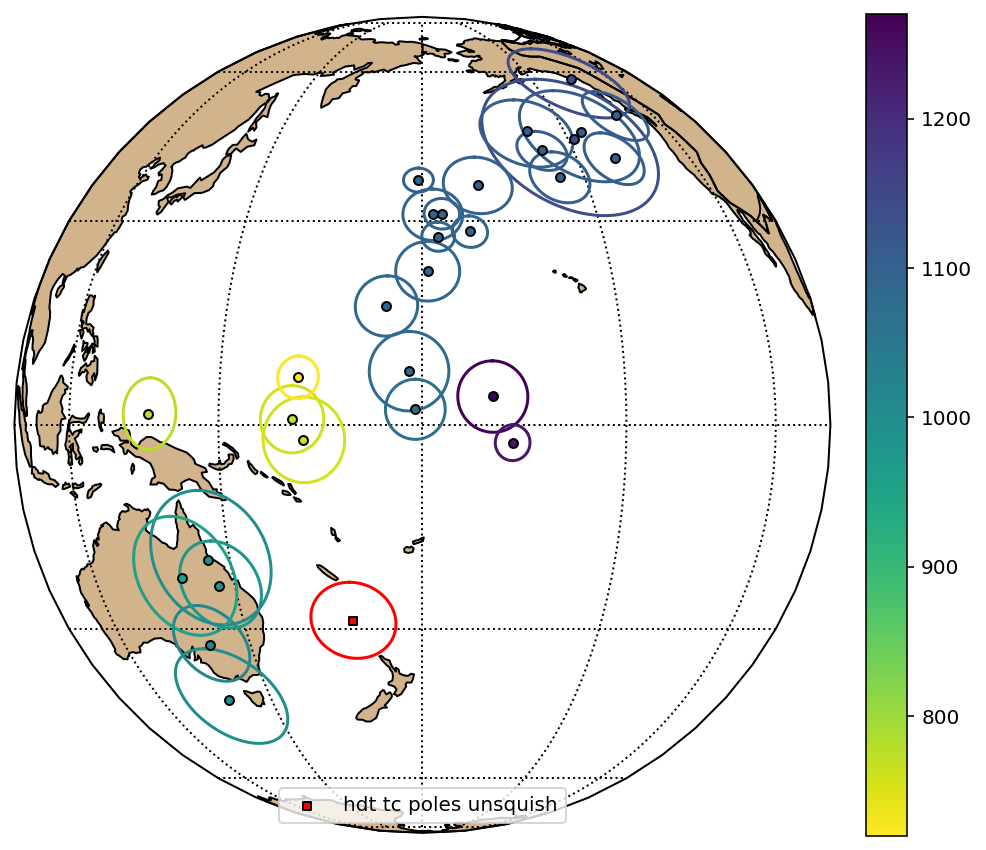

In [33]:
m = ipmag.make_orthographic_map(central_latitude=0,central_longitude=180)
m.add_feature(Laurentia_outline)
plt.figure(num=1,figsize=(10, 10))

viridis = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=720, vmax=1270)
# scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')
scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap='viridis_r')

for n in poles.index:
    rgba = scalarMap.to_rgba(poles.AgeNominal[n])
    hex_color = colors.rgb2hex(rgba)
#     hex_color
    ipmag.plot_pole(m,poles.PLon[n],poles.PLat[n],poles.A95[n],color=hex_color)

Jacobsville_color = colors.rgb2hex(scalarMap.to_rgba(995))
ipmag.plot_pole(m, SC1_spec_hdt_tc_unsquish_mean_pole['dec'], SC1_spec_hdt_tc_unsquish_mean_pole['inc'], SC1_spec_hdt_tc_unsquish_mean_pole['alpha95'], 
                color = 'red', marker = 's', label = 'hdt tc poles unsquish')

scalarMap.set_array(np.linspace(720,1110))    
plt.colorbar(scalarMap,orientation='vertical',fraction=0.046, pad=0.04)
plt.legend(loc=8)
#plt.savefig('../Figures/Kewee_Track_Grenville_Loop.pdf')
plt.show()

### test E/I method

Bootstrapping.... be patient

The original inclination was: 34.25610446215444

The corrected inclination is: 36.81261728956039
with bootstrapped confidence bounds of: 30.37506396192201 to 50.56528859832887
and elongation parameter of: 2.036321777039035
The flattening factor is: 0.9049999999999999


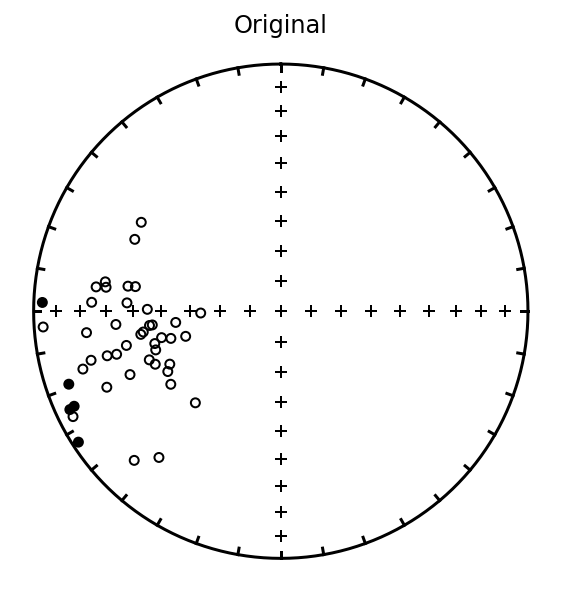

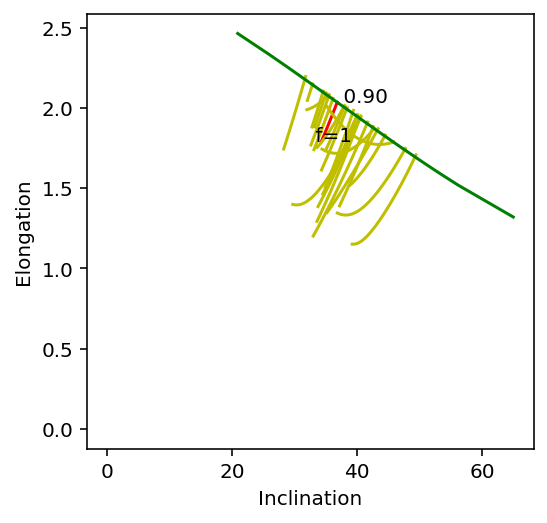

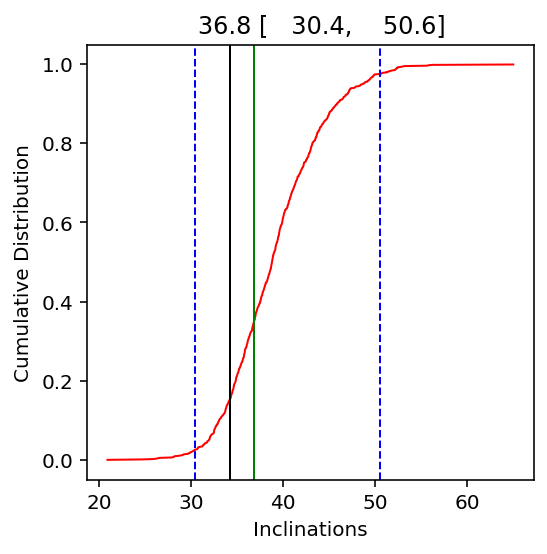

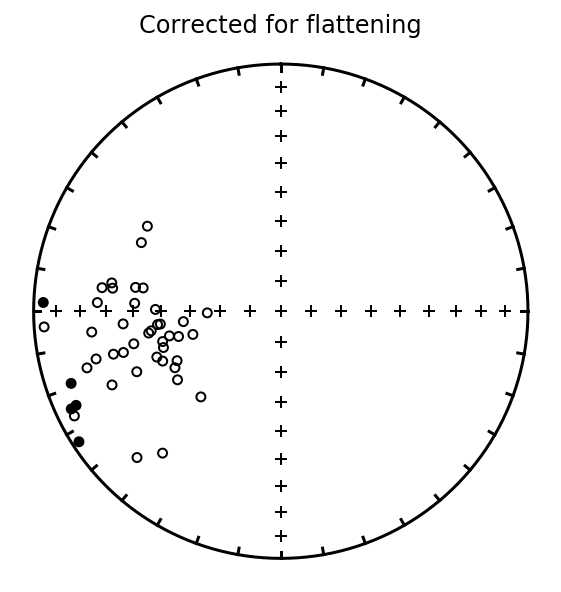

In [34]:
hdt_tc_di_block = ipmag.make_di_block(SC1_spec_hdt_tc['dir_dec'].tolist(), SC1_spec_hdt_tc['dir_inc'].tolist())
hdt_tc_ei_corrected = ipmag.find_ei(np.array(hdt_tc_di_block),save=False, return_new_dirs=True)

### unflattening result of Jacobsville directions

- It turns out 0.6 for flattening facter does make the scatter of the directions worse - an increase in A95 value from 6.4 to 7.2
- the E/I method also shows the predicted flattening factor is 0.9... with a wide range of uncertainty